<a href="https://colab.research.google.com/github/khaneng/Loan-Default-Prediction/blob/main/loan_defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


#**Solution Approach**

* Read data, examine the data and its types
* Data Pre-Processing
* Feature Engineering
* Missing value imputation
* Encoding Categorical datas
* Move target variable to different dataframe
* Split - train and cross validation sets
* Train the model using CatBoostClassifier
* Predict

In [4]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Importing packages...


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_Artivatic_dataset/train_indessa.csv")

In [6]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_Artivatic_dataset/test_indessa.csv")

In [6]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [7]:
print("Total number of columns: ",df.shape[1])

Total number of columns:  45


In [8]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

One column(loan_status) is our target variable and rests are the input variables

In [9]:
df.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

#**EDA: Exploratory Data Analysis**

In [10]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


### **Pre-processing**

### Term Feature
* remove months
* convert to numeric 
* rename column as term(month)

In [8]:
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 
df['term'] = pd.to_numeric(df['term'])
df.rename(columns = {'term':'term(months)'}, inplace = True)


In [9]:
df_test['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 
df_test['term'] = pd.to_numeric(df_test['term'])
df_test.rename(columns = {'term':'term(months)'}, inplace = True)

### last_week_pay Feature
* remove th week
* remove NA
* convert to numeric

In [10]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value=None, regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'])

In [11]:
df_test['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df_test['last_week_pay'].replace(to_replace='NA', value=None, regex=True, inplace=True)
df_test['last_week_pay'] = pd.to_numeric(df_test['last_week_pay'])

### emp_length Feature
* remove year, years, '+', '<'
* convert to numeric

In [12]:
df['emp_length'].replace(to_replace='years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='\+', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< ', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='year', value='', regex=True, inplace=True)

df['emp_length'] = pd.to_numeric(df['emp_length'])

In [13]:
df_test['emp_length'].replace(to_replace='years', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace='\+', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace='< ', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace='year', value='', regex=True, inplace=True)

df_test['emp_length'] = pd.to_numeric(df_test['emp_length'])

## **Feature Engineering**

###**Handling Columns with null values**

We will replace the null values with 2 approaches:

* in numerical columns with the mean
* in categorical columns with the median

In [14]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term(months)                        0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [15]:
numeric_columns = ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term(months)',
        'int_rate', 'emp_length',  'annual_inc',    
          'revol_bal', 'revol_util',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
         'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

obj_categorical_columns = ['batch_enrolled','emp_title','desc','addr_state','grade','sub_grade',
                  'home_ownership','title','verification_status','pymnt_plan','purpose','zip_code','dti',
                  'initial_list_status','application_type','verification_status_joint', ]

num_categorical_columns = ['acc_now_delinq','delinq_2yrs','inq_last_6mths','mths_since_last_delinq',
                       'mths_since_last_record','open_acc','pub_rec','total_acc','collections_12_mths_ex_med',
                       'mths_since_last_major_derog','last_week_pay',]

### **Replace null with the mean value**

In [16]:
# Replace null with mean values
for col in numeric_columns:
  df[col].fillna(df[col].mean(skipna = True), inplace=True)
  df_test[col].fillna(df_test[col].mean(skipna = True), inplace=True)
    

### **Label encoding of categorical datas and replace null with median**

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in obj_categorical_columns:
  df[cols] = le.fit_transform(df[cols].astype(str))
  df_test[cols] = le.fit_transform(df_test[cols].astype(str))


In [18]:
for cols in num_categorical_columns + obj_categorical_columns:
  df[cols].fillna(df[cols].median(skipna = True), inplace=True)
  df_test[cols].fillna(df_test[cols].median(skipna = True), inplace=True)

### **Input and Target dataframe**

In [19]:
y = df['loan_status']
x = df.drop(columns = ['loan_status'])

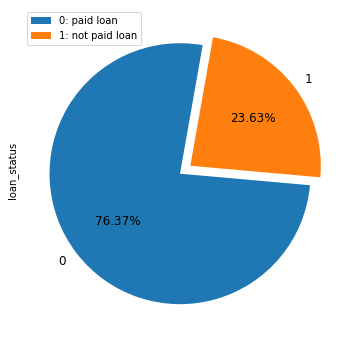

In [33]:
y.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

# **Findding Corelation**

In [35]:
corre=pd.DataFrame()
for i in x.columns:
  print(i)
  corre[i]= pearsonr(y, x[i])
    
corre.T

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term(months)
batch_enrolled
int_rate
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
pymnt_plan
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
mths_since_last_major_derog
application_type
verification_status_joint
last_week_pay
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim


,0,1
member_id,-0.489753,0.000000e+00
loan_amnt,-0.095713,0.000000e+00
funded_amnt,-0.097563,0.000000e+00
funded_amnt_inv,-0.101877,0.000000e+00
term(months),-0.130959,0.000000e+00
batch_enrolled,0.059416,0.000000e+00
int_rate,0.002590,5.881430e-02
grade,-0.056775,0.000000e+00
sub_grade,-0.056880,0.000000e+00
emp_title,-0.030505,8.286758e-110


In [36]:
corre2= corre.T.iloc[:,0].sort_values(ascending=False)
corre2

last_week_pay                  0.255405
title                          0.179038
inq_last_6mths                 0.087306
purpose                        0.059788
batch_enrolled                 0.059416
total_rec_int                  0.038344
mths_since_last_record         0.026823
zip_code                       0.025329
mths_since_last_delinq         0.014776
tot_cur_bal                    0.012884
verification_status_joint      0.012156
int_rate                       0.002590
pymnt_plan                     0.000125
total_acc                     -0.002636
home_ownership                -0.003807
total_rec_late_fee            -0.004353
mths_since_last_major_derog   -0.004959
annual_inc                    -0.008596
tot_coll_amt                  -0.011635
application_type              -0.013133
acc_now_delinq                -0.014417
total_rev_hi_lim              -0.017275
dti                           -0.021116
addr_state                    -0.021528
verification_status           -0.022152


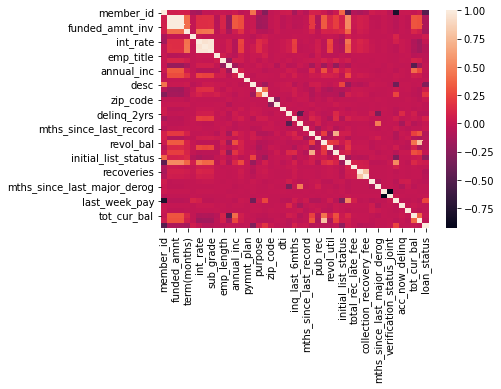

In [37]:
corre3 = df.corr()
corre3
sns.heatmap(corre3)

# **Model Training**
* We will split the data into train and test
* Train the CatBoost Classifier with the train dataset and predict with test dataset
* Plot the ROC curve

In [23]:
x_train,x_test,y_train, y_test  = train_test_split(x, y, test_size=0.33)

## **CatBoost Classifier** 

In [ ]:
!pip install catboost

In [25]:
from catboost import CatBoostClassifier

    # Training the model
model_cat = CatBoostClassifier( learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True, eval_metric = 'AUC')
model_cat.fit(x_train, y_train)

    # Predicting the probability
y_pred_prob = model_cat.predict_proba(x_test)
y_pred = [value[1] for value in y_pred_prob]

    # Accuracy ROC-AUC
accuracy_per_roc_auc = roc_auc_score(y_test, y_pred)
print("==========================")
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

    

ROC-AUC: 97.5853305104%


In [26]:
print("==========================")
y_pred_class = []
for x in y_pred:
  if x>0.5:
    y_pred_class.append(1)
  else:
    y_pred_class.append(0)
print(metrics.classification_report(y_test,y_pred_class ))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    134233
           1       0.84      0.93      0.88     41469

    accuracy                           0.94    175702
   macro avg       0.91      0.94      0.92    175702
weighted avg       0.94      0.94      0.94    175702



## **Plot ROC curve**

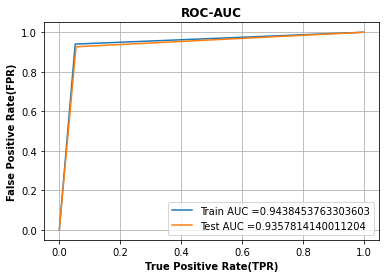

In [27]:
y_train_pred = model_cat.predict(x_train)    
y_test_pred = model_cat.predict(x_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show()

# **Predict on Test Data (test_inessa.csv)**

In [42]:
y_pred_prob = model_cat.predict_proba(df_test)
y_pred_default = pd.DataFrame([value[1] for value in y_pred_prob])
df_test['loan_status'] = y_pred_default[0]
submission = df[['member_id','loan_status']]
submission.to_csv('submission.csv')


# **Final Result is saved in submission.csv**